In [139]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import sklearn
from sklearn.tree import DecisionTreeClassifier
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper, Div
from bokeh.layouts import gridplot, column
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus as pydot
from sklearn import tree
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
model = RandomForestClassifier(n_estimators=500, random_state=1111, max_depth=14)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)

In [118]:
data = pd.read_csv('alldata.csv')

C:\Users\Naeemah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [119]:
data['AGE'] = pd.to_numeric(data['AGE'])

In [120]:
bins = [20, 30,  40,  50,  60,  70,  80]
data['AGE_BINS'] = pd.cut(data['AGE'], bins)

In [121]:
data['SALARY_NEW'] = data[' SALARY '].str.replace('$', '')

In [122]:
data['SALARY_NEW'] = data['SALARY_NEW'].str.replace(',', '')

In [123]:
data['SALARY'] = data['SALARY_NEW'].str.replace(' -   ', '')

In [124]:
data = data.drop('SALARY_NEW', axis=1)

In [125]:
data['SALARY'] = pd.to_numeric(data['SALARY'], errors='coerce')

In [126]:
bins = [0, 5000, 10000, 20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 200000]
data['SALARY_BINS'] = pd.cut(data['SALARY'], bins)

In [127]:
data = data.drop('SALARY', axis=1)

In [128]:
data = data.drop(' SALARY ', axis=1)

In [129]:
data = data.drop('REFID', axis=1)
data = data.drop('MINORITY', axis=1)

In [130]:
data['FIELD_MAJOR_RECENT_DEGREE'].fillna('None', inplace=True)

In [131]:
mydata = data

In [132]:
Xone = pd.get_dummies(mydata, prefix_sep='_', drop_first=False)

In [133]:
Xone = Xone.drop(['SATISFACTION_JOB_Somewhat dissatisfied','SATISFACTION_JOB_Somewhat satisfied','SATISFACTION_JOB_Very dissatisfied'], axis=1)

In [134]:
X = Xone.drop('SATISFACTION_JOB_Very satisfied',axis=1)
y = Xone['SATISFACTION_JOB_Very satisfied']

In [141]:
model = tree.DecisionTreeClassifier()
#model = RandomForestClassifier(n_estimators=500, random_state=1111, max_depth=14)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#model.fit(X_train.values.reshape(-1, 1), y_train)

model.fit(X_train,y_train.ravel())
#accu_train = np.sum(model.predict(X_train.values.reshape(-1, 1)) == y_train)/y_train_size
#accu_test = np.sum(model.predict(X_test.values.reshape(-1, 1)) == y_test)/y_test_size


#print("Accuracy on Train: ", accu_train)
#print("Accuracy on Test: ", accu_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [136]:
for i, item in enumerate(model.feature_importances_):
    print("{0:s}:{1:.2f}".format(X.columns[i], item))

AGE:0.03
GENDER_Female:0.00
GENDER_Male:0.00
RACE_Asian:0.00
RACE_Under-represented minorities:0.00
RACE_White:0.00
BIRTH_PLACE_Not in the US:0.00
BIRTH_PLACE_United States:0.00
US_CITIZENSHIP_No:0.00
US_CITIZENSHIP_Yes:0.00
US_CITIZEN_TYPE_Born abroad of American parents:0.00
US_CITIZEN_TYPE_Born in US or US territories:0.00
US_CITIZEN_TYPE_By naturalization:0.00
US_CITIZEN_TYPE_None:0.00
TOTAL_CHILDREN_None:0.00
TOTAL_CHILDREN_One child:0.00
TOTAL_CHILDREN_Two or more children:0.00
HOURS_WORKED_20 or less:0.00
HOURS_WORKED_21 - 35 hours:0.00
HOURS_WORKED_36 - 40 hours:0.00
HOURS_WORKED_Greater than 40 hours:0.00
HAVE_HEALTH_CARE_No:0.00
HAVE_HEALTH_CARE_Yes:0.00
HAVE_PENSION_No:0.00
HAVE_PENSION_Yes:0.00
HAVE_PROFIT_SHARE_No:0.00
HAVE_PROFIT_SHARE_Yes:0.00
HAVE_VACATION_No:0.00
HAVE_VACATION_Yes:0.00
PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related:0.00
PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related:0.00
PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related:0.00
PRINCIPAL

In [137]:
def printTree(model, index):
    feature_names = ['AGE','SATISFACTION_JOB_ADVANCE_Somewhat dissatisfied','SATISFACTION_JOB_ADVANCE_Somewhat satisfied','SATISFACTION_JOB_ADVANCE_Very dissatisfied','SATISFACTION_JOB_ADVANCE_Very satisfied','SATISFACTION_JOB_BENEFITS_Very satisfied','SATISFACTION_JOB_CHALLENGE_Somewhat dissatisfied','SATISFACTION_JOB_CHALLENGE_Somewhat satisfied','SATISFACTION_JOB_CHALLENGE_Very dissatisfied','SATISFACTION_JOB_CHALLENGE_Very satisfied','SATISFACTION_JOB_INDEP_Somewhat dissatisfied','SATISFACTION_JOB_INDEP_Somewhat satisfied','SATISFACTION_JOB_INDEP_Very satisfied','SATISFACTION_JOB_LOC_Somewhat satisfied','SATISFACTION_JOB_LOC_Very satisfied','SATISFACTION_JOB_RESP_Somewhat dissatisfied','SATISFACTION_JOB_RESP_Somewhat satisfied','SATISFACTION_JOB_RESP_Very satisfied','SATISFACTION_JOB_SALARY_Somewhat dissatisfied','SATISFACTION_JOB_SALARY_Somewhat satisfied','SATISFACTION_JOB_SALARY_Very dissatisfied','SATISFACTION_JOB_SALARY_Very satisfied','SATISFACTION_JOB_SECURITY_Somewhat dissatisfied','SATISFACTION_JOB_SECURITY_Somewhat satisfied','SATISFACTION_JOB_SECURITY_Very satisfied','SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat dissatisfied','SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat satisfied','SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied']
    target_names = ['0','1']
    dot_data = tree.export_graphviz(model, out_file=None,
                                   feature_names = feature_names,
                                   class_names = target_names)
    #Build the graph
    
    graph = pydot.graph_from_dot_data(dot_data)
    
    #Write the image
    
    Image(graph.create_png())
    graph.write_png("tree" + str(index) + ".png")
    

[Text(183.7678192903644, 214.24235294117648, 'X[223] <= 0.069\nentropy = 0.489\nsamples = 49898\nvalue = [28653, 21245]'),
 Text(108.94449254282624, 207.8470588235294, 'X[227] <= 0.498\nentropy = 0.303\nsamples = 26675\nvalue = [21705, 4970]'),
 Text(70.3431763040043, 201.45176470588234, 'X[235] <= 0.03\nentropy = 0.233\nsamples = 22446\nvalue = [19421, 3025]'),
 Text(49.03022794614856, 195.0564705882353, 'X[203] <= 0.602\nentropy = 0.157\nsamples = 16287\nvalue = [14893, 1394]'),
 Text(32.6301094664813, 188.66117647058823, 'X[201] <= 0.136\nentropy = 0.137\nsamples = 15504\nvalue = [14361, 1143]'),
 Text(16.923579110743823, 182.26588235294116, 'X[215] <= -0.163\nentropy = 0.072\nsamples = 8726\nvalue = [8399, 327]'),
 Text(13.021144364943696, 175.87058823529412, 'X[0] <= 1.803\nentropy = 0.054\nsamples = 6705\nvalue = [6520, 185]'),
 Text(11.120541837218527, 169.47529411764705, 'X[269] <= 3.186\nentropy = 0.05\nsamples = 6460\nvalue = [6295, 165]'),
 Text(8.603011313842753, 163.079999

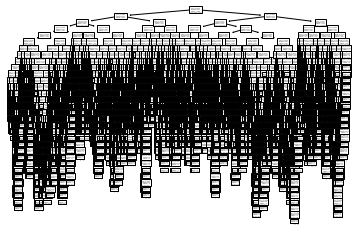

In [142]:
tree.plot_tree(model)